## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
%matplotlib inline
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function, division

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [29]:
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

## 1. Is temperature is normalized. 

Yes

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


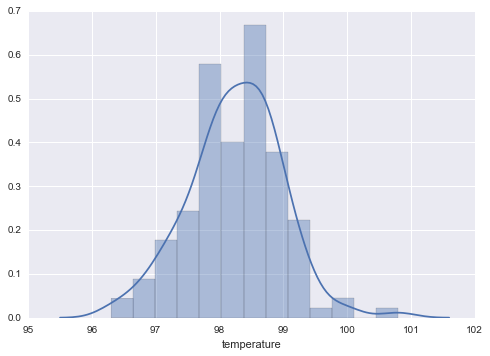

In [4]:
xs=df.temperature
import seaborn as sns
sns.distplot(xs)


In [5]:
xs.mean()

98.24923076923078

## 2. Is the true population mean really 98.6 degrees F?


In [6]:
def make_sample(n=100):
    sample= xs.sample(n, replace=True)
    return sample

In [7]:
sample=make_sample(n=10)
sample.mean(), sample.std()

(98.2, 0.46188021535170004)

In [8]:
def sample_stat(sample):
    return sample.mean()

In [9]:
def compute_pop_mean(n=100, iters=100):
    stats = [sample_stat(make_sample(n)) for i in range(iters)]
    return np.array(stats)

In [10]:
sample_mean=compute_pop_mean(n=100, iters=100)

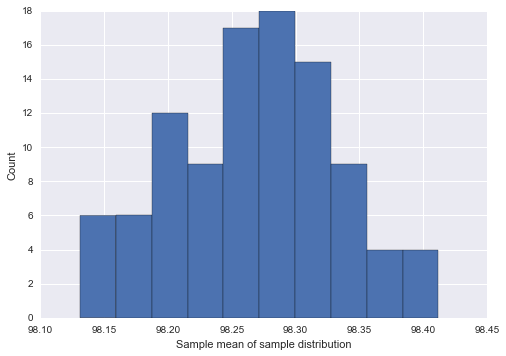

In [15]:
plt.hist(sample_mean)
plt.xlabel('Sample mean of sample distribution')
plt.ylabel('Count')

Lets consider null hypothesis that mean temperature is 98.6 

In [17]:
p_value= sum(sample_mean ==98.6) /len(sample_mean)
p_value

0.0

Under Null hypothesis , it is highly unlikely that population mean is 98.6. Hence we can reject null hypothesis

In [34]:
z_value = sample_mean.mean()- 98.6/sample_mean.std()/sqrt(130)
z_value

-36.457125226328586

Z value is preferred here.

## 3. Margin of error and confidence interval

In [40]:
std_err= sample_mean.std()
CI = np.percentile(sample_mean, [5,99])
print ("Margin of error", std_err)
print("Confidence Interval", CI)

Margin of error 0.0641887614774
Confidence Interval [ 98.1538   98.40309]


## 4. Difference between males and females in temperature

In [41]:
df.head(3)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0


In [47]:
Male_temp = df[df.gender=='M'].temperature
female_temp = df[df.gender =='F'].temperature

In [62]:
def Teststatics(data):
    data1, data2=data
    x = abs(data1.mean() - data2.mean())
    return x

In [64]:
DiffTemp = Teststatics((Male_temp,female_temp))

In [66]:
DiffTemp

0.289230769230727

There is a difference b/w male and female temperature by 0.28. However, we will continue our null hypothesis by assuming that there is no difference b/w male and female temperature

In [56]:
n,m = len(Male_temp),len(female_temp)
pool= np.hstack((Male_temp,female_temp))

In [59]:
def RunModel():
    np.random.shuffle(pool)
    data = pool[n:],pool[:n]
    return data

In [60]:
RunModel()

(array([  98.2,   98.7,   97.5,   98.2,   97.8,   98.2,   98.6,   97.7,
          99. ,   98. ,   98.6,   97.8,   98.1,   98.4,   98.6,   99. ,
          98. ,   97.2,   98.2,   99. ,   98.2,   98.5,   98.6,   98.6,
          99.4,   98.8,   98.8,   98.8,   97.4,   97.3,   99.1,   99.5,
          97.1,   98.8,   97.1,   97.9,   99.2,   99.3,   98.4,   98.7,
          97.4,   98.4,  100. ,   98.3,   98.6,   97.8,   98.7,   98. ,
          98. ,   98.9,   99. ,   98.7,   97. ,   99.2,   99.1,   99.3,
          98.4,   97.9,   98.7,   98.8,   98.8,   97.6,   96.3,   98. ,
          98.1]),
 array([ 100.8,   97.9,   98.2,   96.7,   96.7,   98.8,   98.4,   97.8,
          98.2,   98.6,   97.1,   98. ,   99.2,   98.2,   98.3,   98.2,
          98. ,   97.7,   96.8,   97.6,   98.4,   98.5,   97.2,   97.7,
          98. ,   98.7,   98.3,   98.6,   97.8,   99.4,   97.6,   98.3,
          98.8,   98.3,   98.7,   96.4,   98.7,   98. ,   97.4,   97.5,
          98.5,   97.4,   98.4,   98.6,   98.4

In [67]:
Teststatics(RunModel())

0.018461538461536975

In [80]:
test_stat = np.array([Teststatics(RunModel()) for i in range(1000)])

In [81]:
test_stat.shape

(1000,)

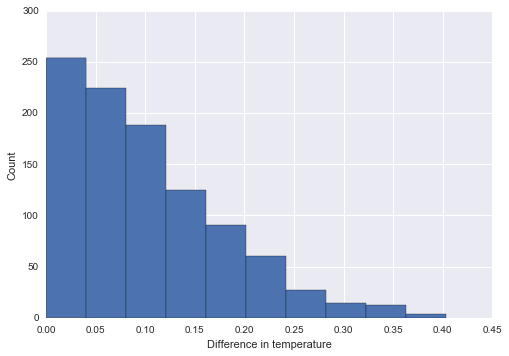

In [82]:
plt.hist(test_stat)
plt.xlabel('Difference in temperature')
plt.ylabel('Count')



In [91]:
p_value = sum(test_stat >= DiffTemp)/len(test_stat)
p_value

0.025000000000000001

Since p-value is very less. hence null hypothesis can be rejected.